# data cleaning 

after show the data we decide to

1-renamed columns
2-convert object type to float type 
3-droped the null values 
4-dropped unnassery rows that can not convert to float type 


In [76]:
import pandas as pd 
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline 

#set visualization settings
large = 30; med = 14; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (20, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [77]:
df = pd.read_csv('trip_review.csv')

In [78]:
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,1.73,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,1.7,1.69,1.7,1.72,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [80]:
column_names = ['user_id', 'churches', 'resorts', 'beaches',
                'parks', 'theatres', 'museums', 'malls', 'zoo',
                'restaurants', 'pubs_bars', 'local_services',
                'burger_pizza_shops', 'hotels_other_lodgings',
                'juice_bars', 'art_galleries', 'dance_clubs',
                 'swimming_pools', 'gyms', 'bakeries', 'beauty_spas',
                'cafes', 'view_points', 'monuments', 'gardens', 'Unnamed: 25']

df.columns = column_names

In [81]:
df.columns

Index(['user_id', 'churches', 'resorts', 'beaches', 'parks', 'theatres',
       'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens',
       'Unnamed: 25'],
      dtype='object')

In [82]:
df.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,2.078339,2.125511,2.190861,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,1.249208,1.406542,1.576686,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,2.285000,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


In [83]:
df.drop('Unnamed: 25', axis = 1, inplace = True)


In [84]:
df.drop('user_id', axis = 1, inplace = True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5456 non-null   float64
 1   resorts                5456 non-null   float64
 2   beaches                5456 non-null   float64
 3   parks                  5456 non-null   float64
 4   theatres               5456 non-null   float64
 5   museums                5456 non-null   float64
 6   malls                  5456 non-null   float64
 7   zoo                    5456 non-null   float64
 8   restaurants            5456 non-null   float64
 9   pubs_bars              5456 non-null   float64
 10  local_services         5456 non-null   object 
 11  burger_pizza_shops     5455 non-null   float64
 12  hotels_other_lodgings  5456 non-null   float64
 13  juice_bars             5456 non-null   float64
 14  art_galleries          5456 non-null   float64
 15  danc

In [86]:
df['local_services']= df.local_services.apply(float)

ValueError: could not convert string to float: '2\t2.'

###### so we will pick up the rows that can not convert to float 

In [87]:

df[(df.local_services =='2\t2.')]

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
2712,1.71,1.68,1.46,1.13,1.12,1.15,1.26,1.17,1.59,0.85,2\t2.,NaN,0.84,5.0,5.0,1.08,1.1,1.04,5.0,4.43,5.0,5.0,5.0,2.57


In [88]:
df = df.drop(labels = 2712, axis = 0)

In [89]:
df['local_services']= df.local_services.apply(float)

###### we will check on nun value 

In [90]:


df.isnull().sum()

churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs_bars                0
local_services           0
burger_pizza_shops       0
hotels_other_lodgings    0
juice_bars               0
art_galleries            0
dance_clubs              0
swimming_pools           0
gyms                     0
bakeries                 0
beauty_spas              0
cafes                    0
view_points              0
monuments                0
gardens                  1
dtype: int64

In [91]:
df = df.dropna()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5454 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   churches               5454 non-null   float64
 1   resorts                5454 non-null   float64
 2   beaches                5454 non-null   float64
 3   parks                  5454 non-null   float64
 4   theatres               5454 non-null   float64
 5   museums                5454 non-null   float64
 6   malls                  5454 non-null   float64
 7   zoo                    5454 non-null   float64
 8   restaurants            5454 non-null   float64
 9   pubs_bars              5454 non-null   float64
 10  local_services         5454 non-null   float64
 11  burger_pizza_shops     5454 non-null   float64
 12  hotels_other_lodgings  5454 non-null   float64
 13  juice_bars             5454 non-null   float64
 14  art_galleries          5454 non-null   float64
 15  danc

## now our data is ready to analysis 

# preprocessing phase 

In [93]:
pd.set_option('display.max_columns', 30)
df.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,local_services,burger_pizza_shops,hotels_other_lodgings,juice_bars,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000,5454.000000
mean,1.455746,2.320048,2.489059,2.797103,2.958904,2.893423,3.351476,2.541177,3.126542,2.832695,2.549622,2.078401,2.125820,2.190429,2.206140,1.192710,0.949349,0.822525,0.969250,0.999626,0.965275,1.749345,1.531051,1.560570
std,0.827732,1.421576,1.247503,1.309188,1.338785,1.282101,1.413291,1.111398,1.356774,1.307299,1.381498,1.249315,1.406682,1.576505,1.715848,1.107176,0.973628,0.948015,1.202883,1.193129,0.928326,1.597816,1.316180,1.171784
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,0.810000,0.780000,0.780000,0.770000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.790000,1.930000,1.620000,1.800000,1.640000,1.580000,1.290000,1.190000,1.030000,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.910000,2.060000,2.460000,2.670000,2.680000,3.230000,2.170000,2.800000,2.680000,2.000000,1.690000,1.610000,1.490000,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.687500,2.740000,4.097500,4.310000,3.837500,5.000000,3.190000,5.000000,3.527500,3.217500,2.287500,2.360000,2.740000,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [94]:
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
import plotly.express as px

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


column_names = ['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo',
                'restaurants', 'pubs_bars', 'local_services',
                'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 
                'art_galleries', 'dance_clubs', 'swimming_pools',
                'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']



counts = df[column_names[:]].astype(bool).sum(axis=0).sort_values()

test = []
for i in range(len(counts.index)):
    test.append(counts.index[i])
    



fig = px.bar(counts, 
             x=counts, 
             y=test,
             color=counts,
                             labels={
                     "total ratings": "Number of reviews",
                     "categories": "this is category"
                 },
                height = 600,
                title="Number of reviews & category")

fig.show()

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Rating')

Text(0.5, 1.0, 'Features Box-Plot')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'churches'),
  Text(1, 0, 'resorts'),
  Text(2, 0, 'beaches'),
  Text(3, 0, 'parks'),
  Text(4, 0, 'theatres'),
  Text(5, 0, 'museums'),
  Text(6, 0, 'malls'),
  Text(7, 0, 'zoo'),
  Text(8, 0, 'restaurants'),
  Text(9, 0, 'pubs_bars'),
  Text(10, 0, 'local_services'),
  Text(11, 0, 'burger_pizza_shops'),
  Text(12, 0, 'hotels_other_lodgings'),
  Text(13, 0, 'juice_bars'),
  Text(14, 0, 'art_galleries'),
  Text(15, 0, 'dance_clubs'),
  Text(16, 0, 'swimming_pools'),
  Text(17, 0, 'gyms'),
  Text(18, 0, 'bakeries'),
  Text(19, 0, 'beauty_spas'),
  Text(20, 0, 'cafes'),
  Text(21, 0, 'view_points'),
  Text(22, 0, 'monuments'),
  Text(23, 0, 'gardens')])

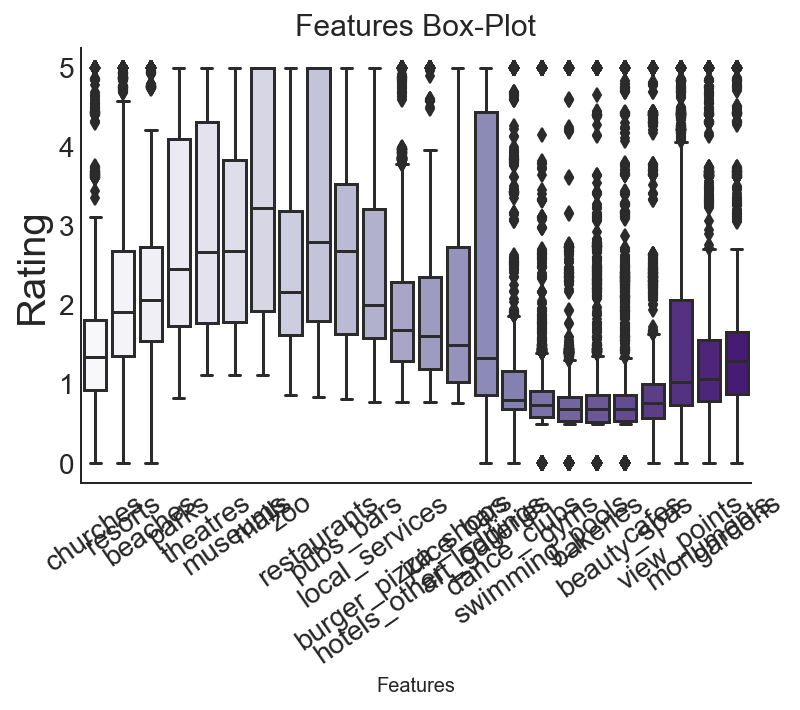

In [95]:
# boxplot = plt.subplots(figsize=(25, 9))

boxplot = sns.boxplot(data= df, palette="Purples")

sns.despine()
boxplot.set_xlabel('Features', fontsize = 10)
boxplot.set_ylabel('Rating', fontsize = 20)
boxplot.set_title('Features Box-Plot', fontsize = 15)

plt.xticks(rotation= 35)
plt.show()


As we can see there are a lot of outliers in some features. 

In [ ]:

plt.figure(figsize=(15,10))
cor = df.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

Here we can observe that our data is  divided into groups. Unfortunately, this is shown to be too fragmented, but with this we will deal with this, finding the optimal number of necessary clusters.

# show the relations between features

### to scaleing data in preprocessing phase we need to understand corelations between our categroies 

In [ ]:
for column in df.columns:
    his = plt.subplots(figsize=(5, 3))
    his = sns.histplot(x = column, data = df, color = sns.color_palette("Purples",1))
    plt.show()

#### now we have a clear vision about our data ,these ghraphes  showed us how to prepare our data for aplying model. Some of these will require normalization

In [ ]:
df.shape

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape